$Ques1:$ What is a Leap-Frog Algorithm?

$Ans:$
The leap-frog algorithm is a numerical method used to solve ordinary differential equations, particularly for time-dependent systems. It is commonly used in molecular dynamics and astrophysics. The algorithm alternates between updating positions and velocities:

Position update:
$$ x(t+dt)=x(t)+v(t)⋅dt+ 1/2 a(t)⋅dt $$

Velocity update:
$$ v(t+dt)=v(t)+a(t+dt)⋅dt $$

The key feature of the leap-frog method is that it updates the position at half time steps, allowing for a more accurate integration of the equations of motion. This approach conserves energy better than simpler methods, making it effective for long-term simulations.

####  Implementing the Leap-Frog Algorithm for SHO

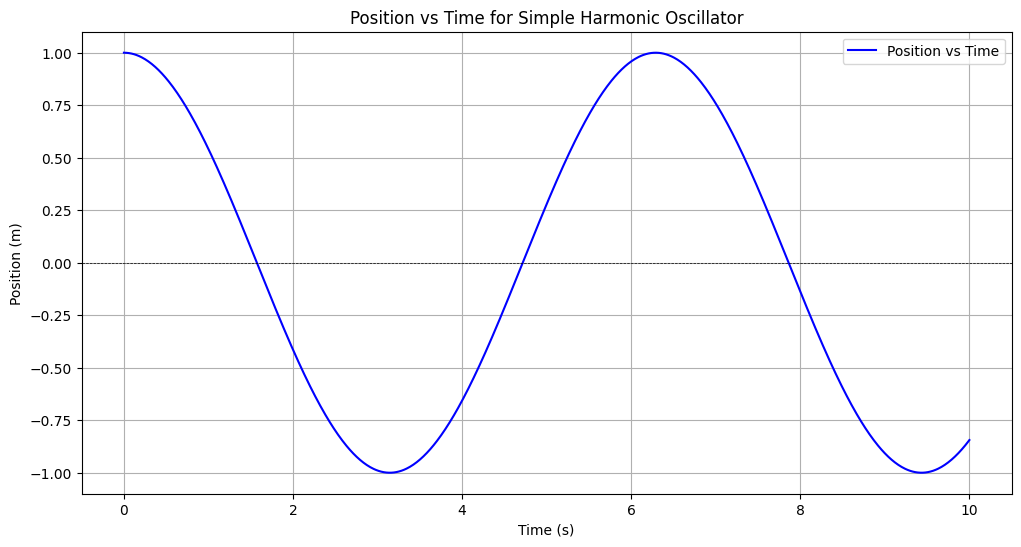

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 1.0  # mass (kg)
k = 1.0  # spring constant (N/m)
dt = 0.01  # time step (s)
total_time = 10.0  # total time of simulation (s)
num_steps = int(total_time / dt)  # number of steps

# Initial conditions
x = np.zeros(num_steps)
v = np.zeros(num_steps)
x[0] = 1.0  # initial position (m)
v[0] = 0.0  # initial velocity (m/s)

# Initial acceleration
a = -k * x[0] / m

# Leap-Frog Algorithm
# Initialize the first half step for velocity
v[0] += a * (dt / 2)

for i in range(0, num_steps - 1):
    # Update position
    x[i + 1] = x[i] + v[i] * dt
    # Update acceleration
    a = -k * x[i + 1] / m
    # Update velocity
    v[i + 1] = v[i] + a * dt

# Time array for plotting
t = np.linspace(0, total_time, num_steps)

# Plot x(t) vs t
plt.figure(figsize=(12, 6))
plt.plot(t, x, label='Position vs Time', color='blue')
plt.title('Position vs Time for Simple Harmonic Oscillator')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid()
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.show()


#### Using the First Three Terms of Taylor Expansion

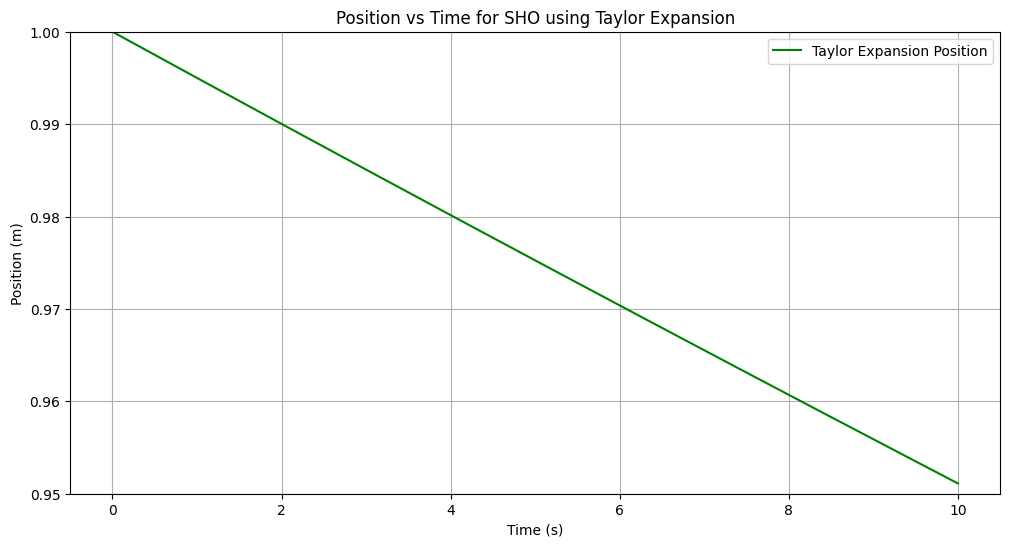

In [6]:
# Using Taylor expansion to solve for position x(t) of SHO
x_taylor = np.zeros(num_steps)
v_taylor = np.zeros(num_steps)

# Initial conditions
x_taylor[0] = 1.0  # initial position (m)
v_taylor[0] = 0.0  # initial velocity (m/s)

# Angular frequency
omega = np.sqrt(k / m)

# Taylor Expansion Algorithm
for i in range(num_steps - 1):
    # Taylor expansion
    x_taylor[i + 1] = (x_taylor[i] + v_taylor[i] * dt +
                       (0.5 * (-k/m) * x_taylor[i]) * dt**2 +
                       (-(omega**3) * x_taylor[i] * dt**3 / 6))

# Plotting the Taylor expansion results
plt.figure(figsize=(12, 6))
plt.plot(t, x_taylor, label='Taylor Expansion Position', color='green')
plt.title('Position vs Time for SHO using Taylor Expansion')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.ylim(0.95, 1.0)  # Set y-axis limits
plt.xlim()
plt.grid()
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.show()
